In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

In [32]:
%matplotlib inline

In [86]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic') 

In [25]:
import requests  #웹페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup #HTML을 파싱하는 모듈
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_driver = './chromedriver'
driver = webdriver.Chrome(chrome_driver)

url = 'http://ncov.mohw.go.kr/bdBoardList_Real.do'
driver.get(url)

source = driver.page_source
ages_datatable = source

# BeautifulSoup 활용하여 페이지소스를 받아옴.
soup_ages = BeautifulSoup(ages_datatable)

# 오늘 날짜 SELECT
today_date = soup_ages.select('div.content div div div.fl_l h5.s_title_in3 span.title_info')
today_date = today_date[0].text.replace('.','/')
print(today_date[1:11])

# 성별, 나이데이터를 age에 받아옴.
age = soup_ages.select('div.data_table table.num tr td span')

# 오늘의 확진자 성별데이터, 확진자 나이데이터 깔끔하게 정리
virusconfirmed_sexdata=[]
virusconfirmed_agedata=[]

sex_list=['남성','여성']
age_list=['어린이','10대','20대','30대','40대','50대','60대','70대','80>=대']
sex_i, age_i = 0,0
for i in range(0,len(age),5):
    if i<6:
        virusconfirmed_sexdata.append([sex_list[sex_i],age[i].text.replace(',','')])
        sex_i+=1
    else:
        virusconfirmed_agedata.append([age_list[age_i],age[i].text.replace(',','')])
        age_i+=1


# 데이터 확인코드
for i in virusconfirmed_sexdata:
    print(i)
print()
for i in virusconfirmed_agedata:
    print(i)

with open('today_vc_sexdata.csv','w',encoding='utf-8') as file:
    file.write('성별,확진자\n')
    for i in virusconfirmed_sexdata:
        file.write('{},{}\n'.format(i[0],i[1]))

with open('today_vc_agedata.csv','w',encoding='utf-8') as file:
    file.write('연령대,확진자\n')
    for i in virusconfirmed_agedata:
        file.write('{},{}\n'.format(i[0],i[1]))

1/8 00시 기준
['남성', '32962']
['여성', '34396']

['어린이', '3373']
['10대', '5253']
['20대', '10680']
['30대', '12637']
['40대', '9604']
['50대', '8601']
['60대', '10574']
['70대', '4228']
['80>=대', '2408']


In [26]:
today_sexvcdata_df = pd.read_csv('today_vc_sexdata.csv', encoding='utf-8')
today_agevcdata_df = pd.read_csv('today_vc_agedata.csv', encoding='utf-8')

In [29]:
today_sexvcdata_df

,성별,확진자
0,남성,32962
1,여성,34396


In [28]:
today_agevcdata_df

,연령대,확진자
0,어린이,3373
1,10대,5253
2,20대,10680
3,30대,12637
4,40대,9604
5,50대,8601
6,60대,10574
7,70대,4228
8,80>=대,2408


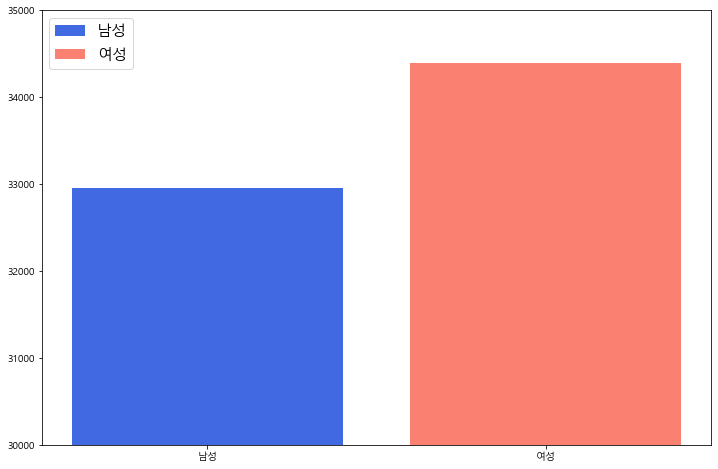

In [34]:
plt.figure(figsize=(12,8))
bars = plt.bar(today_sexvcdata_df['성별'], today_sexvcdata_df['확진자'], color=['royalblue','salmon'])
plt.ylim(30000,35000)
plt.legend(handles=bars, labels=list(today_sexvcdata_df['성별']), fontsize=15)

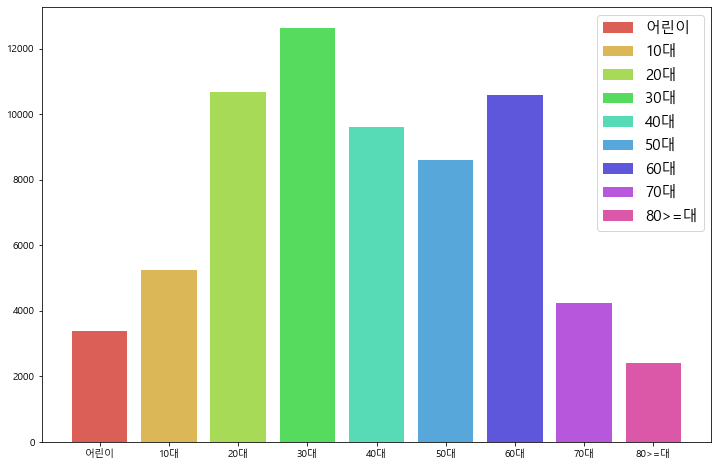

In [35]:
import seaborn as sns

plt.figure(figsize=(12,8))
colors=sns.color_palette('hls',len(today_agevcdata_df))
bars = plt.bar(today_agevcdata_df['연령대'], today_agevcdata_df['확진자'], color=colors)

#plt.ylim()
plt.legend(handles=bars, labels=list(today_agevcdata_df['연령대']), fontsize=15)

In [3]:
seoul = pd.read_csv('corona.csv',encoding='utf-8')
seoul
seoul = seoul.drop(['환자번호','국적','조치사항','환자정보'],axis=1)

In [5]:
# 'yy-mm-dd' 형식으로 확진일 데이터 변환함수
def rename_date(d):
    yy,mm,dd,temp = d.split('.')
    if len(mm) == 1 and len(dd) == 1:
        return yy + '-' + '0' + mm + '-' + '0' + dd
    
    elif len(mm) == 1 and len(dd) == 2:
        return yy + '-' + '0' + mm + '-' + dd
    
    elif len(mm) == 2 and len(dd) == 1:
        return yy + '-' + mm + '-' + '0' + dd
    
    else:
        return yy + '-' + mm + '-' + dd

# 확진일자 변환함수
def virus_confirmed(d):
    yy,mm,dd = d.split('-')
    return yy+'년'+mm+'월'
# ex) 21.01.04. = 2101 ,,, 20.12.23. = 2012

In [6]:
# 확진일을 str타입으로 변경 후, YY-MM-DD 형식으로 변경. (후에 pd.to_datetime 사용하여 날짜형식 데이터로 변경하기 위함)
seoul['확진일'] = seoul['확진일'].astype(str)
seoul['확진일'] = seoul['확진일'].apply(rename_date)

In [7]:
# 확진연월 칼럼추가, 확진일에서 년도, 월 데이터를 꺼내는 함수 사용
seoul['확진연월'] = seoul['확진일'].apply(virus_confirmed)

# 연도, 월 별로 그룹화
months_group = seoul.groupby('확진연월')

In [8]:
print(months_group['확진일'].count())

확진연월
20년01월        7
20년02월       80
20년03월      391
20년04월      156
20년05월      228
20년06월      460
20년07월      281
20년08월     2417
20년09월     1304
20년10월      733
20년11월     2909
20년12월    10397
21년01월      975
Name: 확진일, dtype: int64


In [9]:
df_monthsgroup = pd.DataFrame(months_group['확진일'].count())
df_monthsgroup

,확진일
확진연월,
20년01월,7
20년02월,80
20년03월,391
20년04월,156
20년05월,228
20년06월,460
20년07월,281
20년08월,2417
20년09월,1304


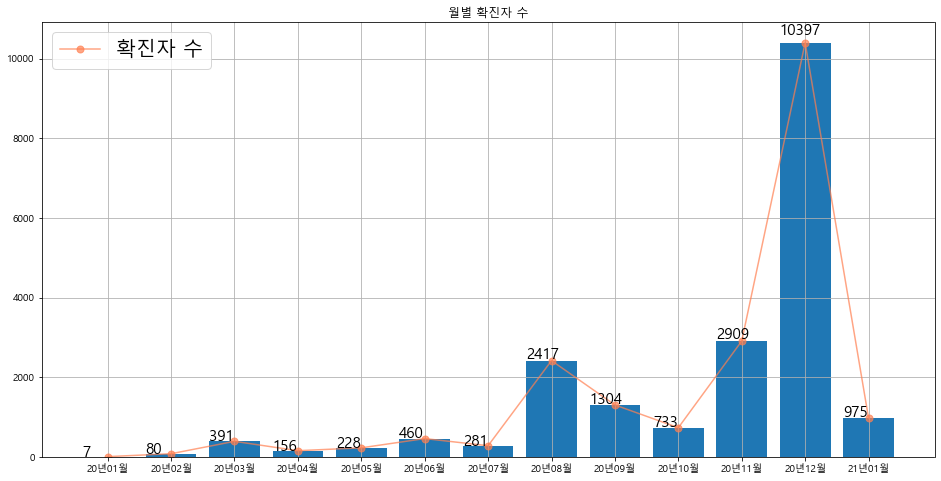

In [10]:
plt.figure(figsize=(16,8))
months_graph = df_monthsgroup.reset_index(drop=False, inplace=False)
ax=plt.bar(months_graph['확진연월'],months_graph['확진일'])
ax2=plt.plot(months_graph['확진연월'],months_graph['확진일'],'-o',color='coral', markersize=7, alpha=0.7)
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x,height*1.02,int(height),fontsize=15,color='black')
plt.legend(['확진자 수'],fontsize=20,loc='upper left')
plt.title('월별 확진자 수')
plt.grid(True)

In [11]:
# 날짜형식으로 확진일 데이터 변경
seoul['확진일']=pd.to_datetime(seoul['확진일'],format='%y-%m-%d')

In [40]:
seoul

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,확진연월,확진요일
0,20338,2021-01-04,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
1,20337,2021-01-04,타시도,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
2,20336,2021-01-04,서대문구,우크라이나,해외유입,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
3,20335,2021-01-04,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
4,20334,2021-01-04,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
...,...,...,...,...,...,...,...,...,...,...,...,...
20333,5,2020-01-31,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,금
20334,4,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,목
20335,3,2020-01-30,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,목
20336,2,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,목


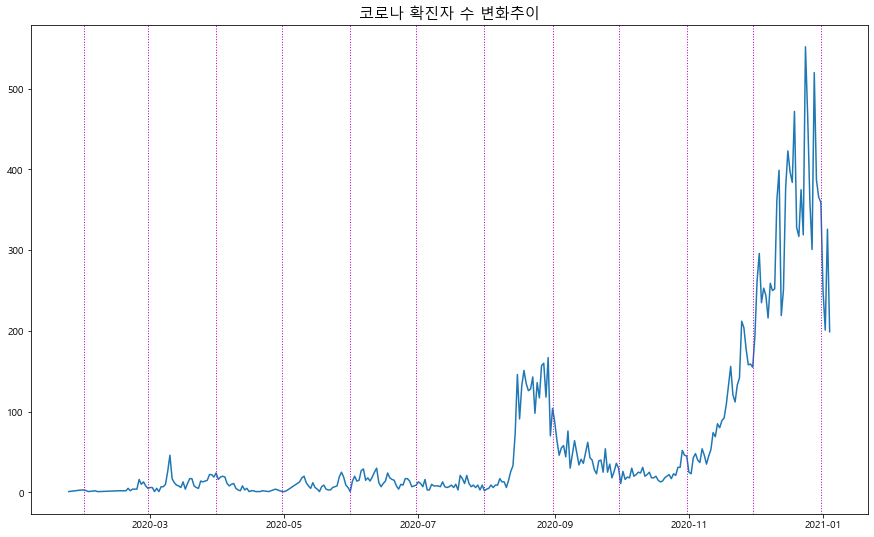

In [42]:
#날짜별 확진자 수  

seoul['확진일']=pd.to_datetime(seoul['확진일'],format='%y-%m-%d')  #확진일 날짜형식으로 변환
seoul.index=seoul['확진일'] 
seoul2=seoul.set_index('확진일')               #index 확진일로 변경
bydate=seoul2.groupby(seoul2.index).count()    #확진일별로 groupby한 후 count 계산

#plot으로 표현

plt.figure(figsize=(15, 9))                     #시계열자료이므로 가로로 길게 창크기 변환  
plt.plot(bydate.index,bydate['연번'])

date_dist=pd.date_range(start='2020-01-01',end='2021-01-01',freq='M') 
for i in range(12):
  plt.axvline(x=date_dist[i],c='m',lw=1,ls=':')  #그래프 해석 용이성을 위해 매달 1일을 선으로 표시

plt.title('코로나 확진자 수 변화추이',fontsize=15)
plt.show()

- 8월 초까지 대체로 50명 안팎이다가 상승세를 탔다.
- 확진자 수에 큰 변화가 있는 시기가 크게 4군데 있다.
1. 3월 초중순 상승세 => 신천지 관련으로 추정. 
1. 8월중순에 급격히 늘어난 확진자 수 =>8.15 집회 영향으로 추정.
2. 11월 한 달간 급격히 늘어난 확진자 수 => 추석이라는 점, 거리두기가 1단계로 하향조정된 후라는 점, 공기가 추워지는 환경적 요인의 영향으로 추정.
3. 12월 말 확진자 수 최고치를 찍은 상승세 => 연말, 겨울의 영향으로 추정.


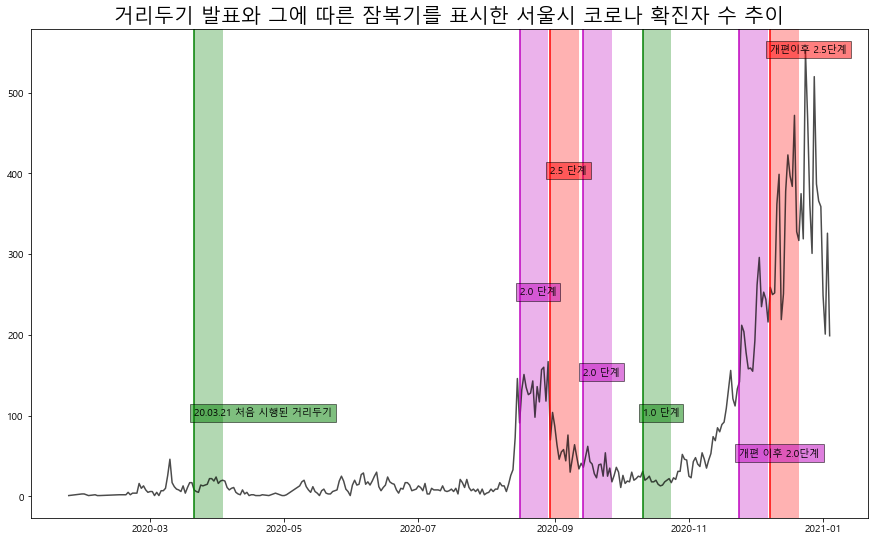

In [43]:
#사회적 거리두기 발표와 그 잠복기를 함께 표시한 그래프

plt.figure(figsize=(15, 9))
plt.plot(bydate.index,bydate['연번'],c='k',alpha=0.7)

#거리두기 시행일은 plt.axvline 이용해 수직선으로 표시, 잠복기간은 plt.axvspan 이용해서 같은 색으로 그 구간 연하게 표시함
#거리두기 시행단계의 가독성을 위해 plt.text의 옵션 중 하나인 bbox를 이용해서 테두리를 표시
#거리두기 1단계는 green, 2단계는 magenta, 2.5단계는 red로 표현

plt.axvline(x=pd.to_datetime('2020-03-21',format='%Y-%m-%d'),c='g')
plt.text(x=pd.to_datetime('2020-03-21',format='%Y-%m-%d'),y=100,s='20.03.21 처음 시행된 거리두기',bbox=dict(facecolor='g', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-03-21',format='%Y-%m-%d'),pd.to_datetime('2020-04-03',format='%Y-%m-%d'), facecolor='g',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-08-16',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-08-16',format='%Y-%m-%d'),y=250,s='2.0 단계',bbox=dict(facecolor='m', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-08-16',format='%Y-%m-%d'),pd.to_datetime('2020-08-29',format='%Y-%m-%d'), facecolor='m',alpha=0.3)


plt.axvline(x=pd.to_datetime('2020-08-30',format='%Y-%m-%d'),c='r')
plt.text(x=pd.to_datetime('2020-08-30',format='%Y-%m-%d'),y=400,s='2.5 단계',bbox=dict(facecolor='r', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-08-30',format='%Y-%m-%d'),pd.to_datetime('2020-09-12',format='%Y-%m-%d'), facecolor='r',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-09-14',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-09-14',format='%Y-%m-%d'),y=150,s='2.0 단계',bbox=dict(facecolor='m', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-09-14',format='%Y-%m-%d'),pd.to_datetime('2020-09-27',format='%Y-%m-%d'), facecolor='m',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-10-11',format='%Y-%m-%d'),c='g')
plt.text(x=pd.to_datetime('2020-10-11',format='%Y-%m-%d'),y=100,s='1.0 단계',bbox=dict(facecolor='g', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-10-11',format='%Y-%m-%d'),pd.to_datetime('2020-10-24',format='%Y-%m-%d'), facecolor='g',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-11-24',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-11-24',format='%Y-%m-%d'),y=50,s='개편 이후 2.0단계',bbox=dict(facecolor='m', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-11-24',format='%Y-%m-%d'),pd.to_datetime('2020-12-07',format='%Y-%m-%d'), facecolor='m',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-12-08',format='%Y-%m-%d'),c='r')
plt.text(x=pd.to_datetime('2020-12-08',format='%Y-%m-%d'),y=550,s='개편이후 2.5단계',bbox=dict(facecolor='r', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-12-08',format='%Y-%m-%d'),pd.to_datetime('2020-12-21',format='%Y-%m-%d'), facecolor='r',alpha=0.3)

plt.title('거리두기 발표와 그에 따른 잠복기를 표시한 서울시 코로나 확진자 수 추이',fontsize=20)

plt.show()

Text(0.5, 1.0, '거리두기 발표와 그에 따른 잠복기를 표시한 서울시 코로나 확진자 수 추이')

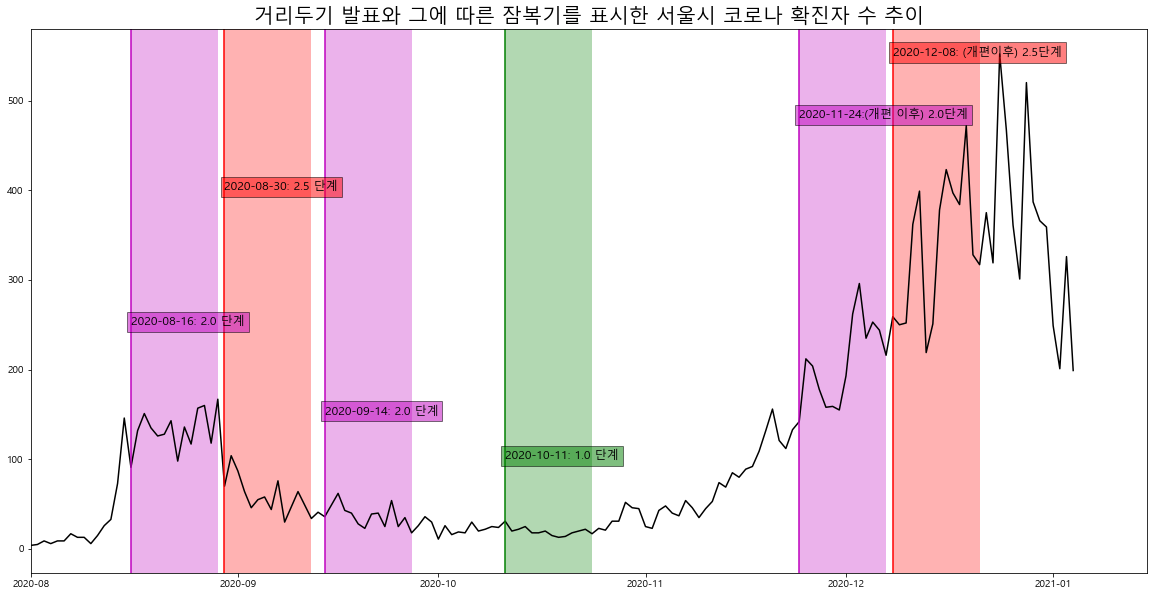

In [44]:
#거리두기 발표가 비교적 잦고 확진자 수에 변화가 큰 8월 이후의 그래프 확대(20.08부터-21.02까지)

plt.figure(figsize=(20, 10))

plt.plot(bydate.index,bydate['연번'],c='k')
plt.xlim(pd.to_datetime('2020-08-01',format='%Y-%m-%d'),pd.to_datetime('2021-01-15',format='%Y-%m-%d'))

plt.axvline(x=pd.to_datetime('2020-08-16',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-08-16',format='%Y-%m-%d'),y=250,fontsize=12,s='2020-08-16: 2.0 단계',bbox=dict(facecolor='m', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-08-16',format='%Y-%m-%d'),pd.to_datetime('2020-08-29',format='%Y-%m-%d'), facecolor='m',alpha=0.3)


plt.axvline(x=pd.to_datetime('2020-08-30',format='%Y-%m-%d'),c='r')
plt.text(x=pd.to_datetime('2020-08-30',format='%Y-%m-%d'),y=400,fontsize=12,s='2020-08-30: 2.5 단계',bbox=dict(facecolor='r', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-08-30',format='%Y-%m-%d'),pd.to_datetime('2020-09-12',format='%Y-%m-%d'), facecolor='r',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-09-14',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-09-14',format='%Y-%m-%d'),y=150,fontsize=12,s='2020-09-14: 2.0 단계',bbox=dict(facecolor='m', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-09-14',format='%Y-%m-%d'),pd.to_datetime('2020-09-27',format='%Y-%m-%d'), facecolor='m',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-10-11',format='%Y-%m-%d'),c='g')
plt.text(x=pd.to_datetime('2020-10-11',format='%Y-%m-%d'),y=100,fontsize=12,s='2020-10-11: 1.0 단계',bbox=dict(facecolor='g', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-10-11',format='%Y-%m-%d'),pd.to_datetime('2020-10-24',format='%Y-%m-%d'), facecolor='g',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-11-24',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-11-24',format='%Y-%m-%d'),y=480,fontsize=12,s='2020-11-24:(개편 이후) 2.0단계',bbox=dict(facecolor='m', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-11-24',format='%Y-%m-%d'),pd.to_datetime('2020-12-07',format='%Y-%m-%d'), facecolor='m',alpha=0.3)

plt.axvline(x=pd.to_datetime('2020-12-08',format='%Y-%m-%d'),c='r')
plt.text(x=pd.to_datetime('2020-12-08',format='%Y-%m-%d'),y=550,fontsize=12,s='2020-12-08: (개편이후) 2.5단계',bbox=dict(facecolor='r', alpha=0.5))
plt.axvspan(pd.to_datetime('2020-12-08',format='%Y-%m-%d'),pd.to_datetime('2020-12-21',format='%Y-%m-%d'), facecolor='r',alpha=0.3)

plt.title('거리두기 발표와 그에 따른 잠복기를 표시한 서울시 코로나 확진자 수 추이',fontsize=20)

- 위 그래프를 살펴보면 대부분의 경우 사회적 거리두기 단계를 상향조정하면 잠복기(2주) 이후 확진자 수가 감소하는 것을 알 수 있다. 


- 하지만 추석이후(10.11) 1단계로 하향조정된 후 11월을 시작으로 확진자 수가 급격히 늘어나는 것을 볼 수 있다. 이 증가추세는 크게 두가지로 설명할 수 있다. 우선, 바이러스가 오래 살아남을 수 있는 차가운 공기를 가진 겨울이라는 환경적 요인으로 인한 증가. 또한, 사람들의 많은 활동량을 동반한 명절 이후 잠복기가 지난 시기라는 것. 


- 이후 겨울이 본격적으로 시작되면서부터는 연말이라는 점과 겨울이라는 환경적 요인이 겹쳐 거리두기 효과가 이전처럼   눈에 띄지는 않는다. 하지만 12월 말을 기점으로 감소하는 추세로 시간이 이전보다는 걸렸지만 효과가 나타나고 있다는 사실을 알 수 있다.


In [45]:
# 2020년 캘린더를 보며 기념일과 기념일명 리스트를 생성
anniversary = [['2020-02-14','Valentine',0],['2020-03-14','Whiteday',0],['2020-04-30','Buddha`s Birthday',0],['2020-05-05','Children`s Day',0],['2020-09-01','Chuseok',0],['2020-10-31','Halloween Day',0],['2020-12-25','Christmas',0]]

# 생성한 리스트에 기념일 이후 2주간 확진자 수를 집계하여 추가
for id, (ymd, name,cnt) in enumerate(anniversary):
    ymd = pd.to_datetime(ymd)
    ymd_plus_2week = ymd + pd.DateOffset(days=14)
    anniversary[id][2]=seoul[(seoul['확진일'] > ymd)&(seoul['확진일'] <= ymd_plus_2week)]['확진일'].count()

In [14]:
anniversary

[['2020-02-14', 'Valentine', 70],
 ['2020-03-14', 'Whiteday', 165],
 ['2020-04-30', 'Buddha`s Birthday', 91],
 ['2020-05-05', 'Children`s Day', 115],
 ['2020-09-01', 'Chuseok', 693],
 ['2020-10-31', 'Halloween Day', 677],
 ['2020-12-25', 'Christmas', 3269]]

In [46]:
# 기념일, 기념일명, 확진자 수 리스트를 활용하여 데이터프레임 생성
df_anniversary = pd.DataFrame(anniversary)
df_anniversary.columns = ['날짜','기념일 명','확진자 수']
df_anniversary = df_anniversary.set_index('기념일 명')
df_anniversary

,날짜,확진자 수
기념일 명,,
Valentine,2020-02-14,70
Whiteday,2020-03-14,165
Buddha`s Birthday,2020-04-30,91
Children`s Day,2020-05-05,115
Chuseok,2020-09-01,693
Halloween Day,2020-10-31,677
Christmas,2020-12-25,3269


In [16]:
confirmed_virus = df_anniversary['확진자 수']
confirmed_virus

기념일 명
Valentine              70
Whiteday              165
Buddha`s Birthday      91
Children`s Day        115
Chuseok               693
Halloween Day         677
Christmas            3269
Name: 확진자 수, dtype: int64

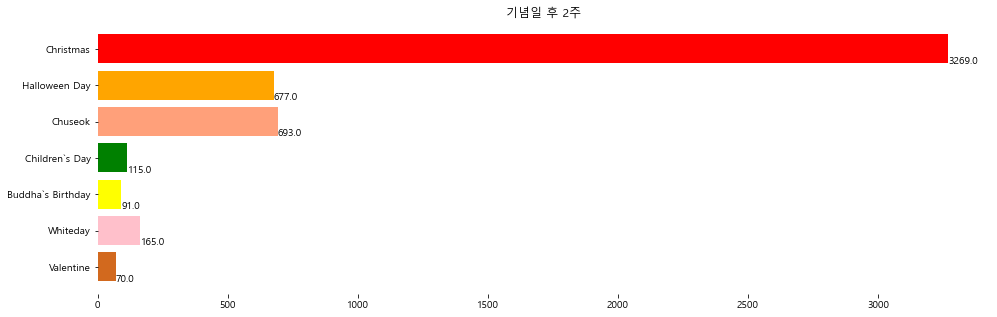

In [51]:
colors=['chocolate','pink','yellow','green','lightsalmon','orange','red']
plt.figure(figsize=(16,5))
ax=plt.barh(df_anniversary.index,confirmed_virus, tick_label=df_anniversary.index, height=0.8, color=colors)
plt.title('기념일 후 2주')

for p in ax.patches:
    x,y,cnt,height = p.get_bbox().bounds
    plt.text(cnt,y,cnt,fontsize=10,color='black',ha='left')

plt.box(False)
plt.show()

In [52]:
# 서울시 코로나 데이터의 확진일 칼럼을 받아와
# 날짜형데이터 . dayofweek를 사용하여
# 0 = 월요일 ... 6 = 일요일 형식으로 변경.
# 이에따라 days 리스트 ['월' ... '일']을 생성하여 반환

def what_day(ymd):
    ymd = pd.to_datetime(ymd)
    days = ['월', '화', '수', '목', '금', '토', '일']
    return days[ymd.dayofweek]

# 서울시 코로나 데이터에
# 확진요일 칼럼을 생성하여 확진일.apply(what_day)를 적용.
seoul['확진요일'] = seoul['확진일'].apply(what_day)

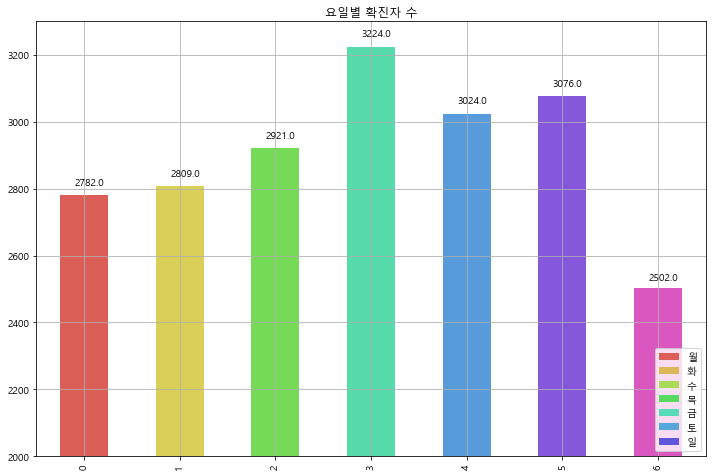

In [53]:
# 확진요일 데이터를 그룹화하여 집계.
days_group = seoul.groupby('확진요일')
days_group_cnt = days_group['확진요일'].count()
df_days_group = pd.DataFrame(days_group_cnt)
df_days_group = df_days_group.loc[['월','화','수','목','금','토','일'], :]
df_days_group['확진자'] = df_days_group['확진요일']
del df_days_group['확진요일']
df_days_group.reset_index(drop=False, inplace=True)

colors=sns.color_palette('hls',len(df_days_group))
ax = df_days_group.plot(kind='bar', figsize=(12,8))
ax = plt.bar(df_days_group['확진요일'],df_days_group['확진자'], color=colors, width=0.5)

# 각각의 bar 위에 집계한 수를 넣어주는 내용
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x+0.15,height*1.01,height,fontsize=10,color='black')
    plt.title('요일별 확진자 수')
plt.legend(handles=bars, labels=list(df_days_group['확진요일']), fontsize=10, loc='lower right')
plt.ylim(2000,3300)
plt.grid(True)

In [54]:
#계절별로 구분하여 계절별 확진자 수 비교(24절기 이용해서 계절 구분)

season=[['봄'],['여름'],['가을'],['겨울']]

spring_sdate=pd.to_datetime('2020-02-04',format='%Y-%m-%d') #봄 (입춘~) 2020-02-04~2020-05-04
spring_edate=pd.to_datetime('2020-05-04',format='%Y-%m-%d')
summer_sdate=pd.to_datetime('2020-05-05',format='%Y-%m-%d') #여름(입하~) 2020-05-05~2020-08-06
summer_edate=pd.to_datetime('2020-08-06',format='%Y-%m-%d')
fall_sdate=pd.to_datetime('2020-08-07',format='%Y-%m-%d')   #가을(입추~) 2020-08-07~2020-11-06
fall_edate=pd.to_datetime('2020-11-06',format='%Y-%m-%d')
winter_sdate=pd.to_datetime('2020-11-07',format='%Y-%m-%d') #겨울(입동~) 2020-11-07~2021- 02-02(데이터는 1/4까지 있다)
winter_edate=pd.to_datetime('2021-02-02',format='%Y-%m-%d')

#계절별로 season 리스트에 확진자 수 count 해서 count 계절별로 list에 append

spring_cnt=seoul[(seoul['확진일']>=spring_sdate)&(seoul['확진일']<=spring_edate)]['확진일'].count()
season[0].append(spring_cnt)
summer_cnt=seoul[(seoul['확진일']>=summer_sdate)&(seoul['확진일']<=summer_edate)]['확진일'].count()
season[1].append(summer_cnt)
fall_cnt=seoul[(seoul['확진일']>=fall_sdate)&(seoul['확진일']<=fall_edate)]['확진일'].count()
season[2].append(fall_cnt)
winter_cnt=seoul[(seoul['확진일']>=winter_sdate)&(seoul['확진일']<=winter_edate)]['확진일'].count()
season[3].append(winter_cnt)

#season 리스트 데이터프레임으로
season_df=pd.DataFrame(season)
season_df.columns=['계절','확진자 수'] #column명 변경
season_df=season_df.set_index('계절')  #index 계절로 변경
season_df

,확진자 수
계절,
봄,629
여름,1008
가을,4628
겨울,14065


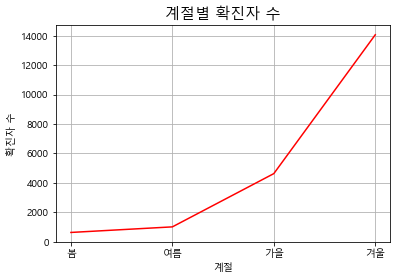

In [39]:
#계절별 확진자 수 plot으로 표현

plt.plot(season_df['확진자 수'],color='r')
plt.title('계절별 확진자 수',fontsize=15)
plt.grid()
plt.xlabel('계절',fontsize=10)
plt.ylabel('확진자 수')
plt.show()

계절별 확진자 수 추이를 보니 여름에서 겨울이 될수록 확진자 수가 급격히 늘어나는 것을 알 수 있다. 특히, 겨울의 경우 데이터가 한달가량 적지만 엄청난 증가폭을 보인다는 것을 알 수 있다. 이 비교를 통해 공기가 차가울수록 바이러스의 생존력이 강하다는 점을 데이터로 확인할 수 있었다.
데이터가 2년치였다면 더 정확한 계절별 경향을 알 수 있었을 것 같다.

In [55]:
region = seoul
region_len = region.groupby('지역')['연번'].count().sum()
region_count = region.groupby('지역')['연번'].count()
region_count = pd.DataFrame(region_count)

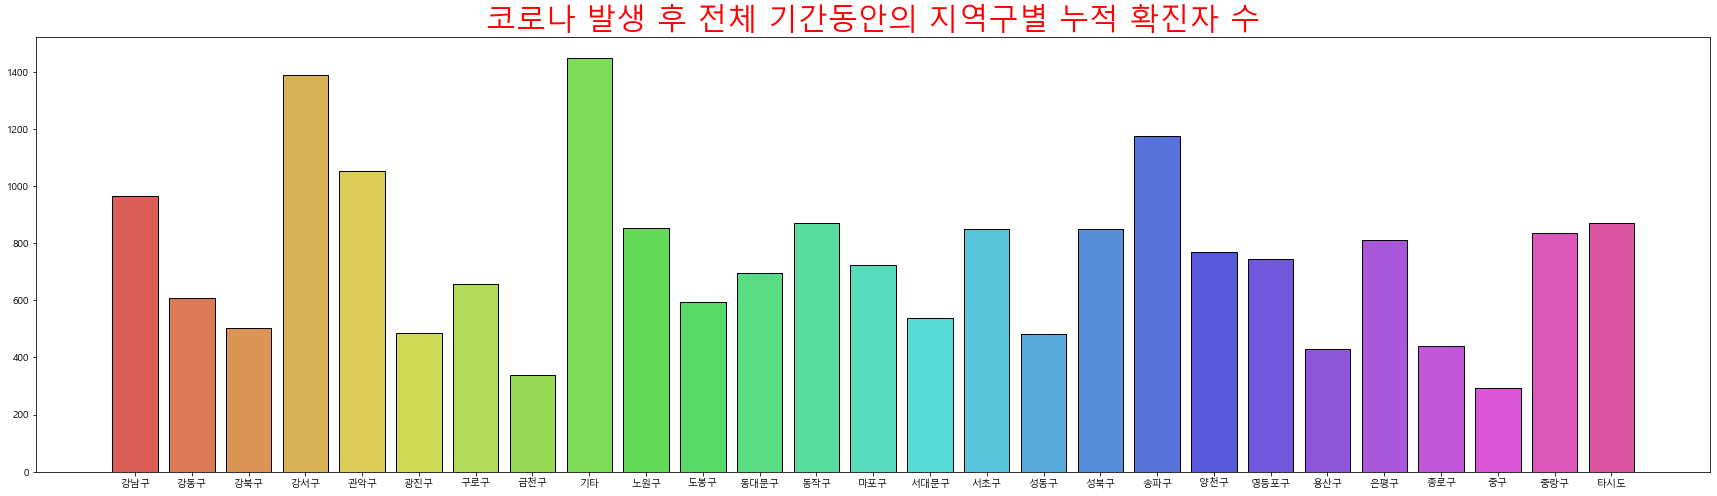

In [56]:
# 코로나 발생 이후 ~ 현재까지 전체기간 동안의 지역구별 확진자 분류
id_region_count = region_count.index.str.strip().unique()
region_count2 = region_count
region_count2.columns = ['누적확진자 수']
region_count2.reset_index(inplace=True)
id_region = []
val_region = []
for i in range(len(region_count2)):
    if region_count2['지역'][i].strip() in id_region:
        pass
    else: 
        id_region.append(region_count2['지역'][i].strip())
        val_region.append(region_count2['누적확진자 수'][i])
df_test = pd.DataFrame(val_region,index=id_region)
df_test.columns=['누적확진자 수']
df_test.reset_index(inplace=True)

colors=sns.color_palette('hls',len(region_count2))
plt.figure(figsize=(30,8))
plt.bar(df_test['index'], df_test['누적확진자 수'],color=colors,edgecolor='black')
plt.title('코로나 발생 후 전체 기간동안의 지역구별 누적 확진자 수',fontsize=30,color='red')
plt.show()

In [57]:
def getHisyType1(s):
    if len(s) > 2 and (s[:2] == '중구'):
        return s[:2]
    if len(s) > 3 and (s[2] == '구') and (s[3] == ' '): 
        return s[:3]
    elif len(s) > 4 and (s[3] == '구'):
        return s[:4]
    else:
        return '기타'
        
def getHisyType2(s):
    if (s == '감염경로 조사 중') | (s == '감염경로 조사중') | (s == '감염경로조사중'):
        return 't'
    elif (s == '확인중') | (s=='확인 중'):
        return 't'
    elif (s == '해외 유입') | (s == '해외 유입') | (s[:3] == '해외') | (s == '해외 접촉 추정'):
        return 't'
    elif (s[2] == '구') and (s[3] == ' '): 
        return 't'
    elif s[3] == '구':
        return 't'
    elif (s == '접촉(추정)') | (s == '접촉 추정') | (s == '접촉(추정)') | (s[-2:] == '접촉') | (s[-6:] == '접촉(추정)') | (s[-3:]=='접촉자') | (s[-5:] == '접촉 추정'):
        return 't'
    elif (s[-2:] == '모임'):
        return 't'
    else:
        return s

In [58]:
histType =  region['접촉력'].apply(getHisyType1).value_counts()
df_histType = pd.DataFrame(histType)

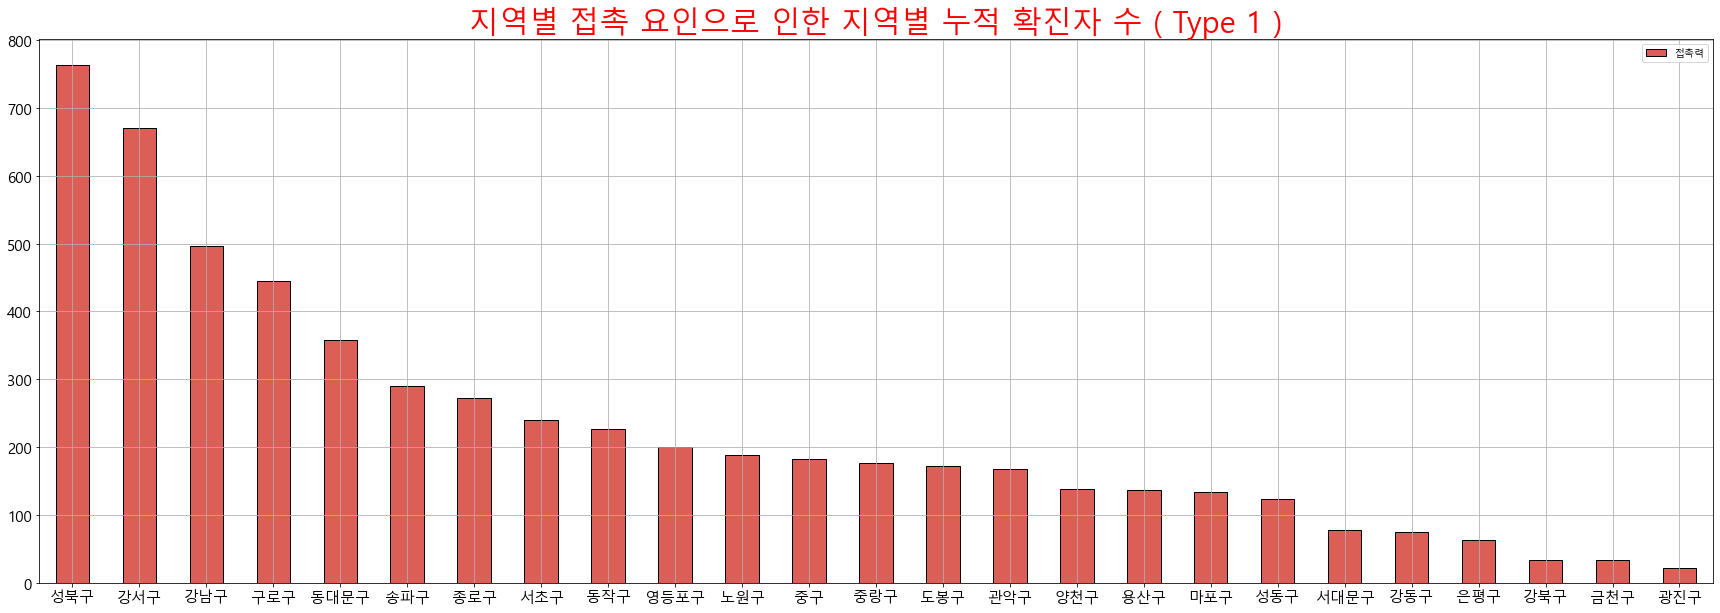

In [59]:
colors=sns.color_palette('hls',len(df_histType[1:]))
a = df_histType[1:].plot.bar(rot=0, fontsize=15,stacked=True, edgecolor='black',color=colors)
a.figure.set_figwidth(30)
a.figure.set_figheight(10)
plt.rc('font', family='NanumBarunGothic') 
plt.title('지역별 접촉 요인으로 인한 지역별 누적 확진자 수 ( Type 1 )',fontsize=30,color='red')
plt.grid(True)
plt.show()

In [60]:
histType2 =  region['접촉력'].apply(getHisyType2).value_counts()
id_histType2 = histType2.index
df_histType2 = pd.DataFrame(histType2[1:])

In [61]:
df_histType2.columns = ['확진자 수']
df_histType2.head(10)

,확진자 수
동부구치소 관련,1069
이태원 클럽 관련,139
8.15서울도심집회,126
리치웨이 관련,119
요양시설 관련,43
중구 소재 시장(남대문시장) 관련,42
용인시 우리제일교회 관련,41
수도권 개척교회 관련,37
극단 산 관련,37
용인시 우리제일교회,33


In [62]:
df_list = []
type_name_list=[]
for i in range(0, 61):
    typeName = histType2[1:].index[i]
    sr = pd.DataFrame(region[region['접촉력'] == histType2[1:].index[i]]['지역'].value_counts())
    if len(sr) != 0:
        df_list.append(sr)
        type_name_list.append(typeName)

In [63]:
histType2[1:]
df_histType2

df_histType3 = df_histType
for i in range(1, 10):
    df_histType3[histType2[1:].index[i]] = region[region['접촉력'] == histType2[1:].index[i]]['지역'].value_counts()
    
df_histType3 = df_histType3.fillna(0);

In [64]:
df_histType3 = df_histType3.drop(['접촉력'],axis=1)

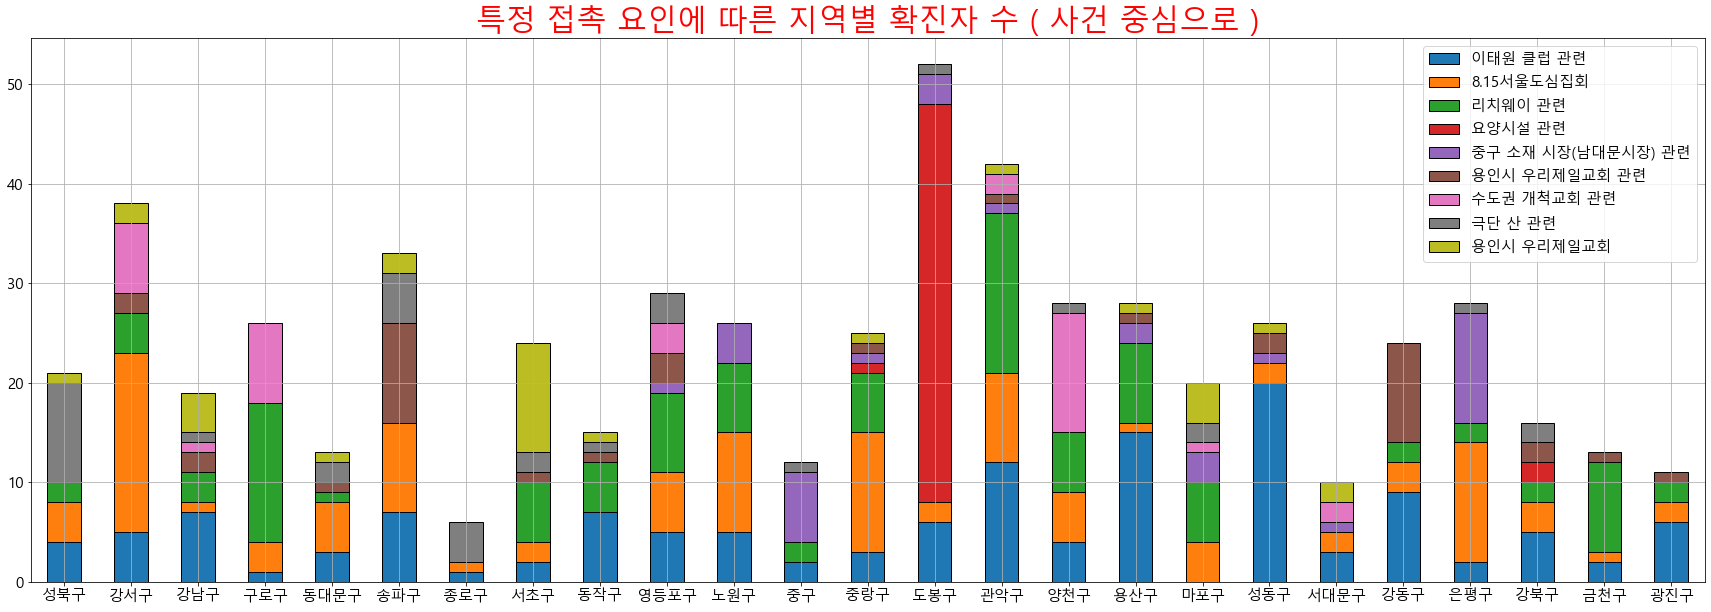

In [67]:
a = df_histType3[1:].plot.bar(rot=0, fontsize=15,stacked=True, edgecolor='black')
a.figure.set_figwidth(30)
a.figure.set_figheight(10)
plt.legend(fontsize=15)
plt.title('특정 접촉 요인에 따른 지역별 확진자 수 ( 사건 중심으로 )',fontsize=30,color='red')
plt.grid(True)
plt.show()

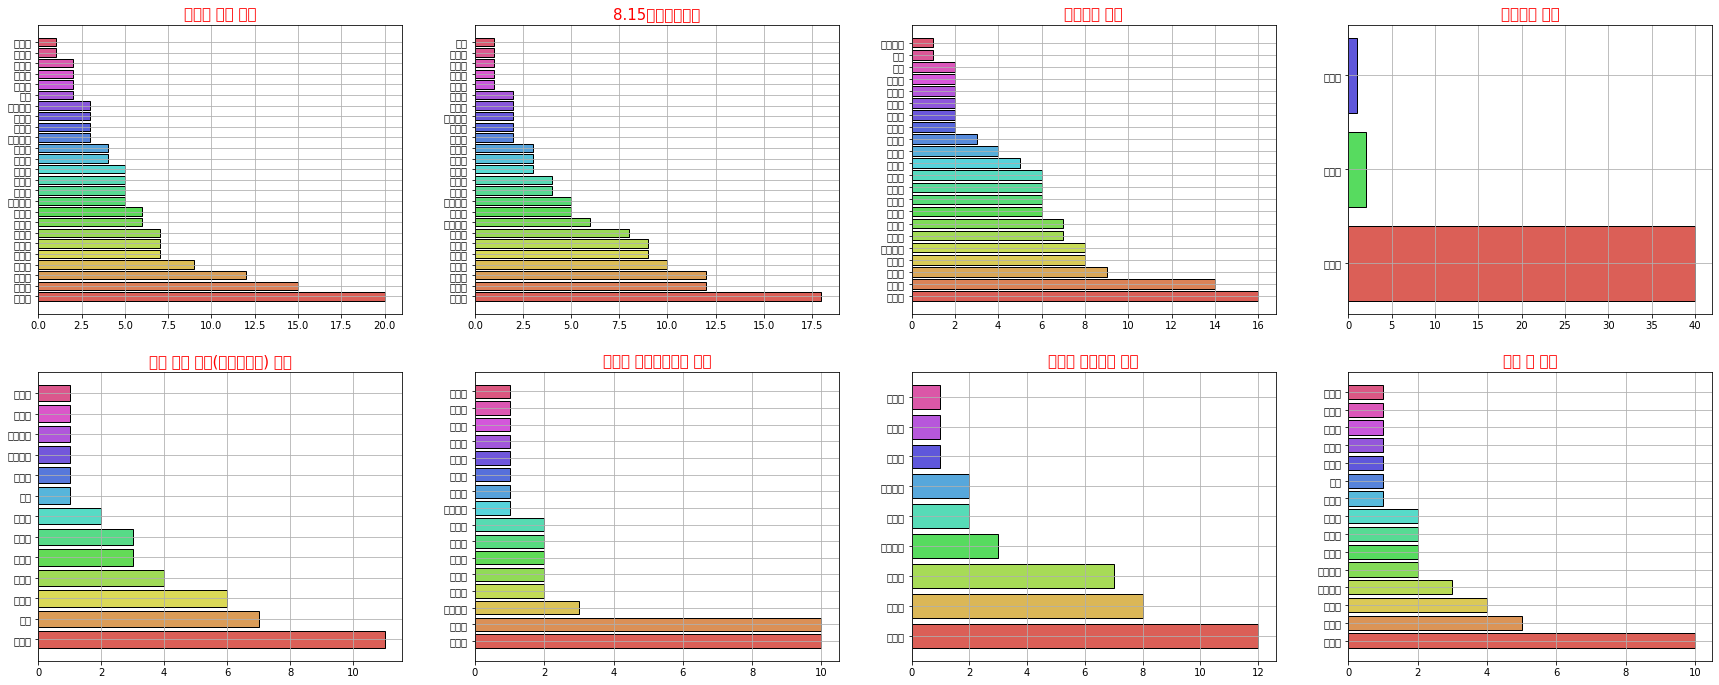

In [69]:
plt.figure(figsize=(30,50))

start = 841 # 951
end = 849  #850 # 960
before_len = 0
df_list2 = df_list[1:] ; type_name_list2 = type_name_list[1:]
for i in range(start,end):
    plt.subplot(i) # subplot 3자리단위가 최대
    typeName=type_name_list2[i-start]
    sr = df_list2[i-start]
    # sr.reset_index(drop=False, inplace=True)
    sr = sr.reset_index(drop=False)
    colors=sns.color_palette('hls',len(sr))
    plt.barh(sr['index'],sr['지역'],color=colors,edgecolor='black')
    plt.grid(True)
    plt.title(typeName, fontsize=15, color='red')

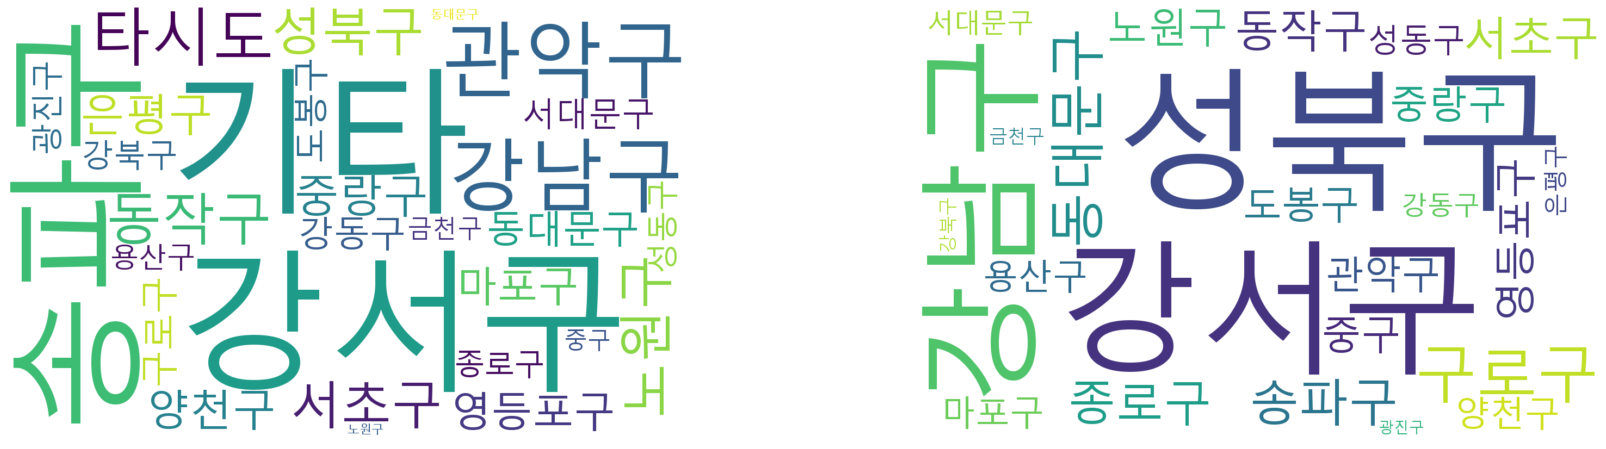

In [76]:
#전체기간
region = seoul
korean_font_path = 'C:/Windows/Fonts/malgun.ttf'

region_len = region.groupby('지역')['연번'].count().sum()
region_count = region.groupby('지역')['연번'].count()
region_count = pd.DataFrame(region_count)

plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
wc = WordCloud(background_color='white',font_path=korean_font_path,width=1250,height=800)
frequencies = region_count['연번']
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.imshow(wordcloud_image, interpolation="bilinear");
plt.axis("off")

plt.subplot(1,2,2)
wc = WordCloud(background_color='white',font_path=korean_font_path,width=1250,height=800)
frequencies = histType[1:]
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")

plt.show()

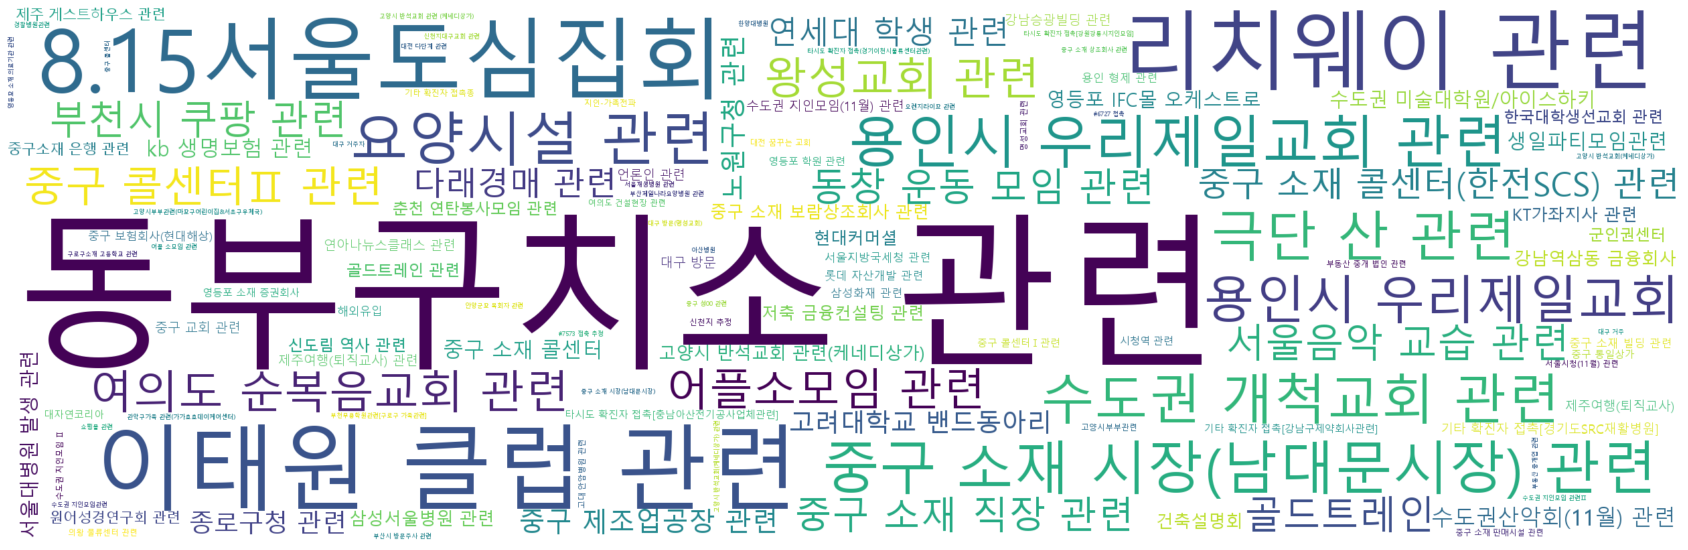

In [78]:
wc = WordCloud(background_color='white',font_path=korean_font_path,width=2500,height=800)
frequencies = histType2[1:]
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(30,10))
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

In [79]:
#사회적 거리두기로 코로나에 대응하고 있는데 그 효과를 데이터를 이용해 알아보자.

#비교를 위한 거리두기 시행일 2주전~시행일 확진자 수
#기본 list를 만든다. 
#총 7번의 거리두기 시행별로 시행일, 단계에 대한 설명, 시행일 기준 2주전까지의 확진자 수 count를 원소로 만든다.

level_announc_bf=[['2020-03-21','첫 거리두기',0],['2020-08-16','2.0 단계',0],['2020-08-30','2.5 단계',0],['2020-09-14','2.0 단계',0],['2020-10-11','1.0 단계',0],['2020-11-24','2.0 단계',0],['2020-12-08','2.5 단계',0]]

for id, (date, announc, cnt) in enumerate(level_announc_bf):       
  date=pd.to_datetime(date)                   #시행일 날짜형식으로 변환
  date_2week_bf=date-pd.DateOffset(days=14)   #잠복기간 2주
  level_announc_bf[id][2]=seoul[(seoul['확진일']>date_2week_bf)&(seoul['확진일']<=date)]['확진일'].count()  
  #기간동안의 count를 계산하고 list에 추가한다.

level_announc_bf_df=pd.DataFrame(level_announc_bf,columns=['시행일','단계','거리두기 전 확진자 수'])   #가독성을 위해 데이터프레임 형식으로
level_announc_bf_df=level_announc_bf_df.set_index('시행일')  #index 날짜로
level_announc_bf_df



,단계,거리두기 전 확진자 수
시행일,,
2020-03-21,첫 거리두기,204
2020-08-16,2.0 단계,466
2020-08-30,2.5 단계,1838
2020-09-14,2.0 단계,731
2020-10-11,1.0 단계,334
2020-11-24,2.0 단계,1447
2020-12-08,2.5 단계,3024


In [80]:
#마찬가지로 거리두기 발표 후 2주간 확진자 수

level_announc=[['2020-03-21','첫 거리두기',0],['2020-08-16','2.0 단계',0],['2020-08-30','2.5 단계',0],['2020-09-14','2.0 단계',0],['2020-10-11','1.0 단계',0],['2020-11-24','2.0 단계',0],['2020-12-08','2.5 단계',0]]

for id, (date, announc, cnt) in enumerate(level_announc):
  date=pd.to_datetime(date)
  date_2week=date+pd.DateOffset(days=14)
  level_announc[id][2]=seoul[(seoul['확진일']>date)&(seoul['확진일']<=date_2week)]['확진일'].count() 

level_announc_df=pd.DataFrame(level_announc,columns=['시행일','단계','거리두기 후 확진자 수'])
level_announc_df=level_announc_df.set_index('시행일')
level_announc_df

,단계,거리두기 후 확진자 수
시행일,,
2020-03-21,첫 거리두기,228
2020-08-16,2.0 단계,1838
2020-08-30,2.5 단계,799
2020-09-14,2.0 단계,507
2020-10-11,1.0 단계,265
2020-11-24,2.0 단계,3024
2020-12-08,2.5 단계,4807


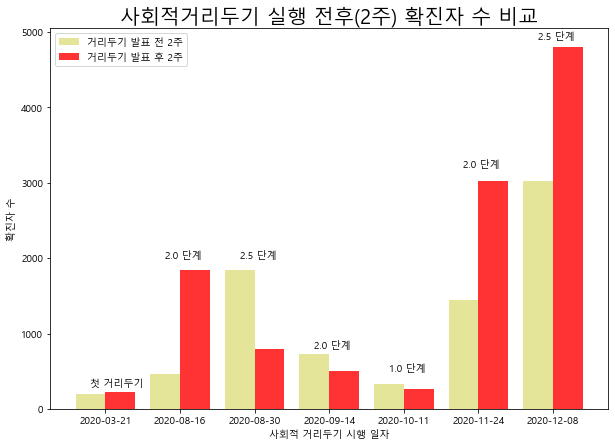

In [87]:
#거리두기 전 후 확진자 수 변화를 알아보기 위해 가 거리두기 시행 전후를 비교하기 용이한 막대그래프를 그린다.

date=['2020-03-21','2020-08-16','2020-08-30','2020-09-14','2020-10-11','2020-11-24','2020-12-08'] #막대그래프별 label
index=np.arange(len(date))

plt.figure(figsize=(10, 7))
plt.bar(index,level_announc_bf_df['거리두기 전 확진자 수'],align='edge',width=0.4,label='거리두기 발표 전 2주',color='y',alpha=0.4)
plt.bar(index+0.4,level_announc_df['거리두기 후 확진자 수'],align='edge',width=0.4,label='거리두기 발표 후 2주',color='r',alpha=0.8)

#각 막대마다 시행한 거리두기 단계를 표시하기 위해 plt.text 이용
plt.xticks(index+0.4,date)
plt.text(index[0]+0.2,300,'첫 거리두기')
plt.text(index[1]+0.2,2000,'2.0 단계')
plt.text(index[2]+0.2,2000,'2.5 단계')
plt.text(index[3]+0.2,800,'2.0 단계')
plt.text(index[4]+0.2,500,'1.0 단계')
plt.text(index[5]+0.2,3200,'2.0 단계')
plt.text(index[6]+0.2,4900,'2.5 단계')

plt.legend()
plt.title('사회적거리두기 실행 전후(2주) 확진자 수 비교',fontsize=20)
plt.xlabel('사회적 거리두기 시행 일자')
plt.ylabel('확진자 수')
plt.show()


- 사회적 거리두기 시행 시점 기준 2주전까지의 확진자 수와 2주후까지의 확진자 수를 막대그래프로 비교해보면 여름에 시행되었던 사회적 거리두기는 효과가 좋았다는 것을 알 수 있다. 
- 하지만 10월 중순부터 확진자 수가 큰 폭으로 증가했고 이는 사회적 거리두기 단계를 격상해도 여름처럼 눈에 띄는 효과를 보이지 못했고 확진자 수는 감소하지 않았다는 사실을 알 수 있다. 


In [82]:
#거리두기 시행 전후 2주간의 확진자 수를 수치적으로 비교해보기 위해 두 데이터프레임을 시행일 기준으로 merge 한다.


res=pd.merge(level_announc_bf_df,level_announc_df,on='시행일').drop(['단계_y'],axis=1)
res=res.rename(columns={'단계_x':'단계'})  #merge 이후 column명 가독성있게 변경
res['증가율']=['11.76%','294.42%','-56.53%','-30.64%','20.66%','108.98%','58.96%']  #거리두기 후 확진자 수 증가율 column 추가
res

,단계,거리두기 전 확진자 수,거리두기 후 확진자 수,증가율
시행일,,,,
2020-03-21,첫 거리두기,204,228,11.76%
2020-08-16,2.0 단계,466,1838,294.42%
2020-08-30,2.5 단계,1838,799,-56.53%
2020-09-14,2.0 단계,731,507,-30.64%
2020-10-11,1.0 단계,334,265,20.66%
2020-11-24,2.0 단계,1447,3024,108.98%
2020-12-08,2.5 단계,3024,4807,58.96%


- 구체적인 수치로 거리두기 시행 전후 확진자 수를 비교해보면 그래프와 마찬가지로 겨울에 비해 여름에 거리두기 효과가 매우 좋았다는 것을 알 수 있다. 8월 말 시행한 2.5단계 거리두기로 확진자 수가 1/2이 되었고 10월중순까지 거리두기 시행 후에 꾸준히 확진자 수가 줄었다. 
- 하지만 겨울이 되면서부터는 그래프와 마찬가지로 반대의 양상이 보인다. 하지만 구체적으로 수치로 비교하여 새롭게 알 수 있는 사실은 겨울에 거리두기 효과가 눈에 띄지는 않았으나 거리두기가 확진자 수 증가폭은 줄였다는 것이다. 거리두기 2.5단계 격상 전인 11월 말에는 2주동안 확진자 수가 대략 108%증가했으나 격상 후인 12월 중순에는 증가폭이 대략 59%로 전에 비해 매우 줄어든것을 볼 수 있다.


# 아쉬웠던 점, 어려웠던 점

- 원하는 데이터를 뽑아오고 가공하는 것은 어느정도 할 수 있었지만,
데이터를 활용하여 그래프를 직접 그려보니 내가 원하는 그래프의 모양대로  표현하는 것이 쉬운 것이 아니라는 것을 알게되었습니다.
후에 더욱 학습하여 그래프를 자유자재로 표현할 수 있는 역량을 갖추고 싶습니다.

- 코로나데이터를 보니, 1년의 데이터로는 뭔가 모자라다는 생각이 들었습니다.
만약 2년치, 3년치의 데이터가 있었다면 시각화를 통해 향후예측이나 대응방안 등을 더 잘알 수 있었을 것 같습니다.

# 만족스러웠던 점

- 처음 csv파일을 읽어오고 .info()를 통해 데이터구조를 확인하는 모습에서 뭔가 성장했다는 것을 느꼈습니다. 또한, 원하는 데이터를 얻기 위해 칼럼의 형식을 변환하여 함수를 적용해보기도 하며 점점 지식이 늘어나는 것이 좋았습니다.

- 웹크롤링을 이용하여 내가 원하는 데이터를 뽑아와서 가공했던 것이 재미있었습니다. 또한, 가공한 데이터를 csv파일 등으로 변환하여 사용할 수 있었던 것이 유익했고 이를 활용하여 데이터프레임을 생성하고 시각화하는 것이 좋았습니다. 데이터의 그룹화를 통해 집계하는 것을 직접해보니 편리하게 원하는 데이터를 얻을 수 있는 점이 인상깊었습니다.